In this case study, we have a collection of images featuring various traffic signs, and our objective is to train a Deep Network to classify them. The dataset consists of 43 distinct classes of images, each corresponding to a specific traffic sign. These classes are described as follows:

Certainly, here are the 43 different classes of traffic signs along with their corresponding numbers:

1. (0, b'Speed limit (20km/h)')
2. (1, b'Speed limit (30km/h)')
3. (2, b'Speed limit (50km/h)')
4. (3, b'Speed limit (60km/h)')
5. (4, b'Speed limit (70km/h)')
6. (5, b'Speed limit (80km/h)')
7. (6, b'End of speed limit (80km/h)')
8. (7, b'Speed limit (100km/h)')
9. (8, b'Speed limit (120km/h)')
10. (9, b'No passing')
11. (10, b'No passing for vehicles over 3.5 metric tons')
12. (11, b'Right-of-way at the next intersection')
13. (12, b'Priority road')
14. (13, b'Yield')
15. (14, b'Stop')
16. (15, b'No vehicles')
17. (16, b'Vehicles over 3.5 metric tons prohibited')
18. (17, b'No entry')
19. (18, b'General caution')
20. (19, b'Dangerous curve to the left')
21. (20, b'Dangerous curve to the right')
22. (21, b'Double curve')
23. (22, b'Bumpy road')
24. (23, b'Slippery road')
25. (24, b'Road narrows on the right')
26. (25, b'Road work')
27. (26, b'Traffic signals')
28. (27, b'Pedestrians')
29. (28, b'Children crossing')
30. (29, b'Bicycles crossing')
31. (30, b'Beware of ice/snow')
32. (31, b'Wild animals crossing')
33. (32, b'End of all speed and passing limits')
34. (33, b'Turn right ahead')
35. (34, b'Turn left ahead')
36. (35, b'Ahead only')
37. (36, b'Go straight or right')
38. (37, b'Go straight or left')
39. (38, b'Keep right')
40. (39, b'Keep left')
41. (40, b'Roundabout mandatory')
42. (41, b'End of no passing')
43. (42, b'End of no passing by vehicles over 3.5 metric tons')

These numbers correspond to the unique classes of traffic signs used in the dataset.



# STEP 1: IMPORT LIBRARIES AND DATASET


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pickle

In [ ]:
with open("valid.p", mode = 'rb') as validation:
  valid = pickle.load(validation)

In [ ]:
with open("test.p", mode = 'rb') as testing:
  test = pickle.load(testing)


In [ ]:
with open("train.p", mode = 'rb') as training:
  train = pickle.load(training)

In [ ]:
X_train, y_train = train['features'], train['labels']

In [ ]:
X_validation, y_validation = valid['features'], valid['labels']

In [ ]:
X_test, y_test = test['features'], test['labels']

# STEP 2: IMAGE EXPLORATION


36

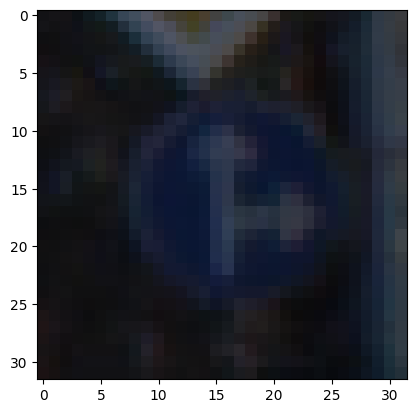

In [ ]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

In [ ]:
from sklearn.utils import shuffle

# STEP 3: DATA PREPARATION
[link text](https://)

In [ ]:
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)

In [ ]:
X_test_gray = np.sum(X_test/3, axis =3, keepdims = True)

In [ ]:
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [ ]:
X_train_gray_norm = (X_train_gray - 64)/64

In [ ]:
X_test_gray_norm = (X_test_gray - 64)/64

In [ ]:
X_validation_gray_norm = (X_validation_gray - 128)/128

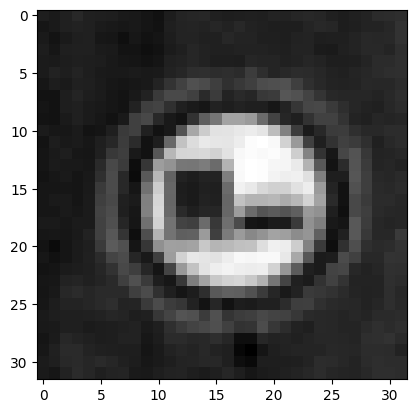

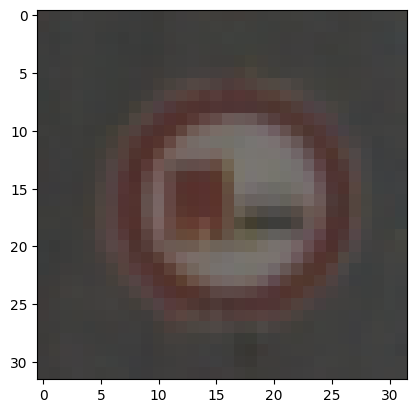

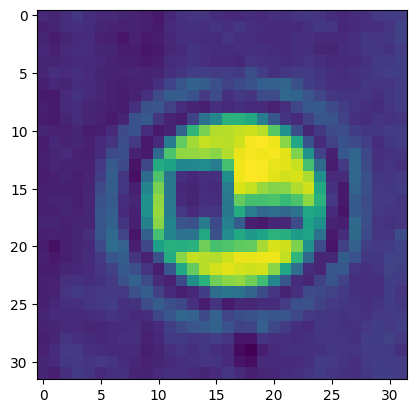

In [ ]:
i = 700
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i])


# STEP 4: TRAINING

```
# This is formatted as code
```



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size =(5, 5), activation = 'relu', input_shape = (32, 32, 1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size =(5, 5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units =120, activation = 'relu'))

cnn_model.add(Dense(units = 84, activation = 'relu'))

cnn_model.add(Dense(units = 43, activation = 'softmax'))

In [ ]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= Adam(lr = 0.001), metrics = ['accuracy'])

In [ ]:
history = cnn_model.fit(X_train_gray_norm, y_train, batch_size = 500, epochs =50, verbose =1, validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 11s 149ms/step - loss: 2.9281 - accuracy: 0.2476 - val_loss: 2.5558 - val_accuracy: 0.3422
Epoch 2/50
70/70 [==============================] - 10s 146ms/step - loss: 1.2120 - accuracy: 0.6610 - val_loss: 1.4132 - val_accuracy: 0.6043
Epoch 3/50
70/70 [==============================] - 10s 147ms/step - loss: 0.6533 - accuracy: 0.8189 - val_loss: 1.0961 - val_accuracy: 0.6778
Epoch 4/50
70/70 [==============================] - 10s 148ms/step - loss: 0.4561 - accuracy: 0.8759 - val_loss: 0.8868 - val_accuracy: 0.7426
Epoch 5/50
70/70 [==============================] - 10s 148ms/step - loss: 0.3593 - accuracy: 0.9013 - val_loss: 0.8140 - val_accuracy: 0.7544
Epoch 6/50
70/70 [==============================] - 10s 148ms/step - loss: 0.2942 - accuracy: 0.9200 - val_loss: 0.8029 - val_accuracy: 0.7726
Epoch 7/50
70/70 [==============================] - 9s 133ms/step - loss: 0.2376 - accuracy: 0.9382 - val_loss: 0.8135 - val_accuracy: 0.7653


In [ ]:
score= cnn_model.evaluate(X_test_gray_norm, y_test, verbose =0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8796


In [ ]:
score

[1.420494556427002, 0.8795724511146545]

In [ ]:
print('Test Loss : {:.4f}'.format(score[0]))

Test Loss : 1.4205


# STEP 5: Prediction

In [ ]:
predicted_probabilities = cnn_model.predict(X_test_gray_norm)
predicted_classes = predicted_probabilities.argmax(axis=-1)


395/395 [==============================] - 2s 5ms/step


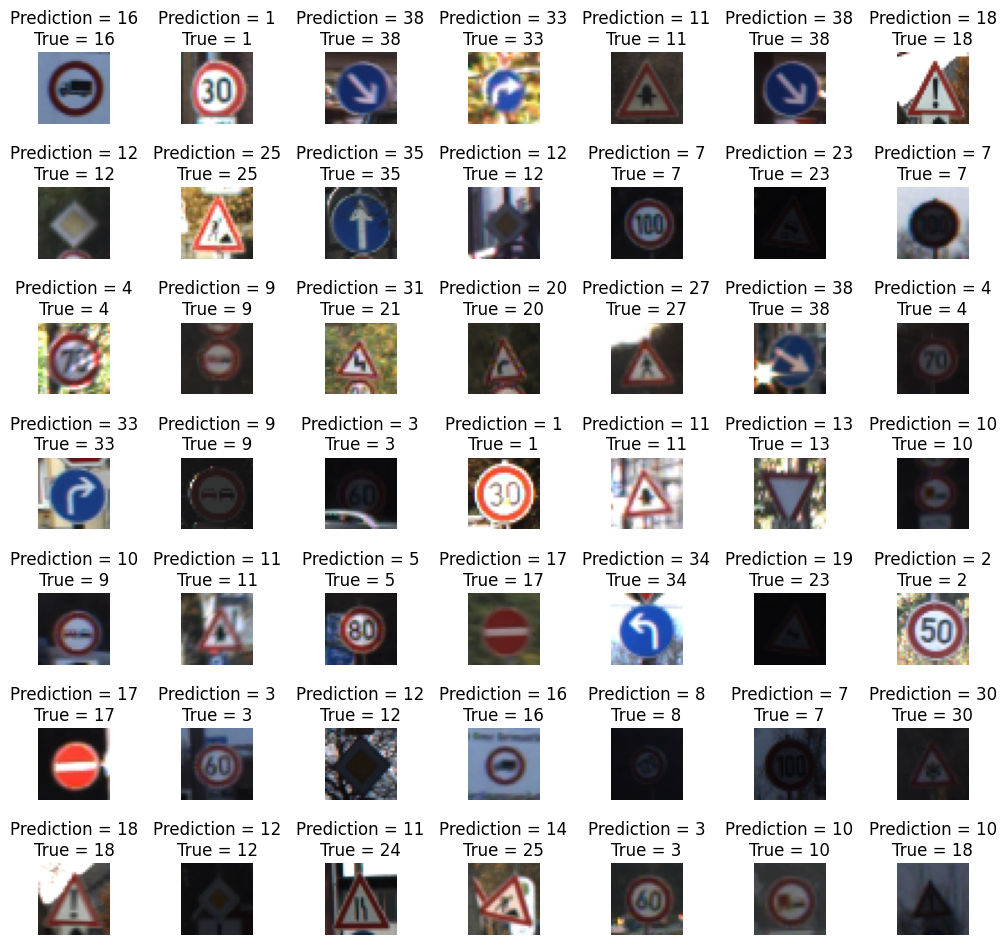

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
for i in np.arange(0, L*W):  # Use np.arange() instead of np.arrange()
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction = {}\nTrue = {}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
